# 4. Etude du jeu de données Diabetes

Nous allons étudier un problème de regression sur un jeu de données de patients atteints de diabète. Nous utiliserons un jeu de données qui décrit 442 patients souffrant de diabète. Il s'agit de prédire l'évolution de la maladie au bout d'un an. Commencons par charger ce dataset et afficher sa description :

In [6]:
from sklearn import datasets
import pandas as pd
import numpy as np

diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data)
df.columns = diabetes.feature_names
df["target"] = diabetes.target

In [7]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

## 4.1 Analyse exploratoire des données

Réalisez une analyse exploratoire de ce dataset, pour vous aider vous pouvez répondre aux questions suivantes :
* Quels sont les types de variables du dataset ?
* Quelles sont les modalités des variables qualitatives ? (aka : catégorielles)
* Quels sont les moyennes, écarts types, min, max ... des variables numériques ?
* Existe-t'il des corrélations fortes entre ces variables numériques ?

Vous pouvez aussi afficher certains graphiques avec matplotlib, seaborn ou plotly. Par exemple : [`sns.distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html), [`sns.boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) ou encore [`sns.heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

Pensez aussi à regarder certains individus de ce dataset (pas seulement des informations statistiques).

Dimensions de la matrice des observations : (442, 11)

Extrait : 



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.04,0.05,0.06,0.02,-0.04,-0.03,-0.04,-0.00,0.02,-0.02,151.00
1,-0.00,-0.04,-0.05,-0.03,-0.01,-0.02,0.07,-0.04,-0.07,-0.09,75.00
2,0.09,0.05,0.04,-0.01,-0.05,-0.03,-0.03,-0.00,0.00,-0.03,141.00
3,-0.09,-0.04,-0.01,-0.04,0.01,0.02,-0.04,0.03,0.02,-0.01,206.00
4,0.01,-0.04,-0.04,0.02,0.00,0.02,0.01,-0.00,-0.03,-0.05,135.00



Types des variables : 

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

Description des variables numériques : 



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,152.13
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,77.09
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14,25.00
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03,87.00
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,140.50
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,211.50
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14,346.00



Description des variables catégorielles : 


Analyse des corrélations : 



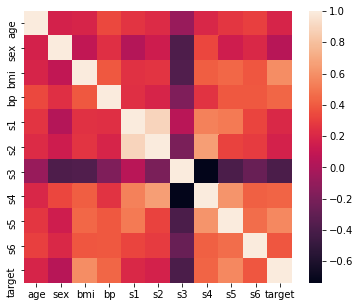


Valeurs manquantes : 

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Boîtes à moustaches : 



/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("V

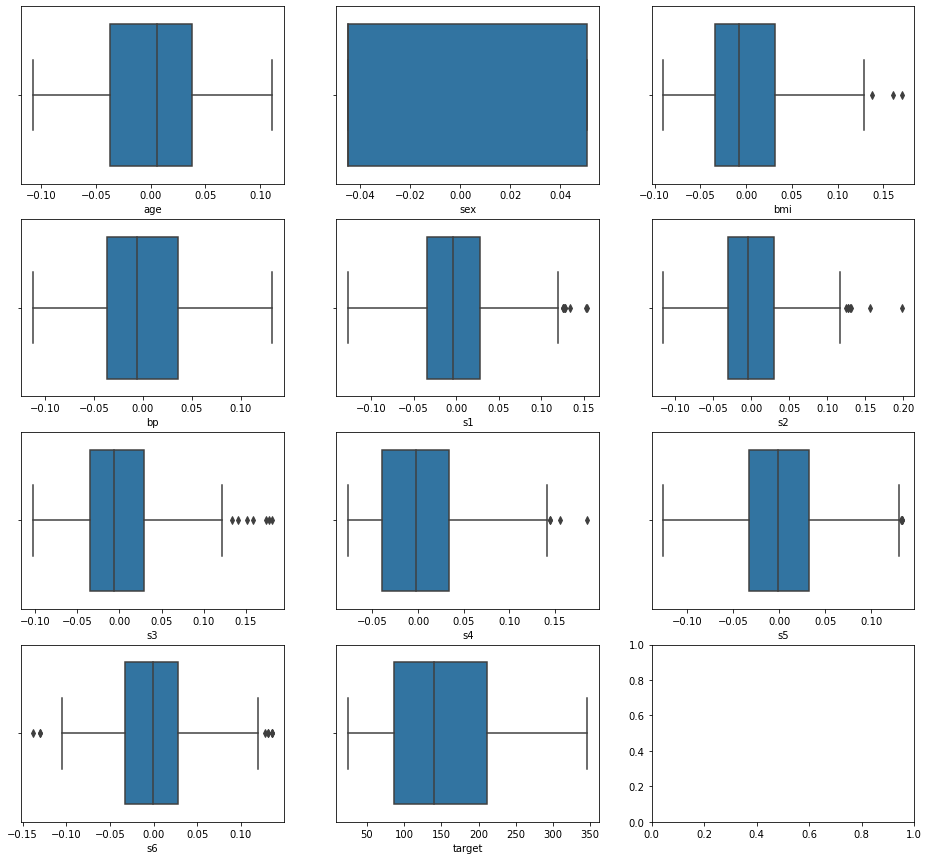


Histogrammes avec estimation de densité : 



/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

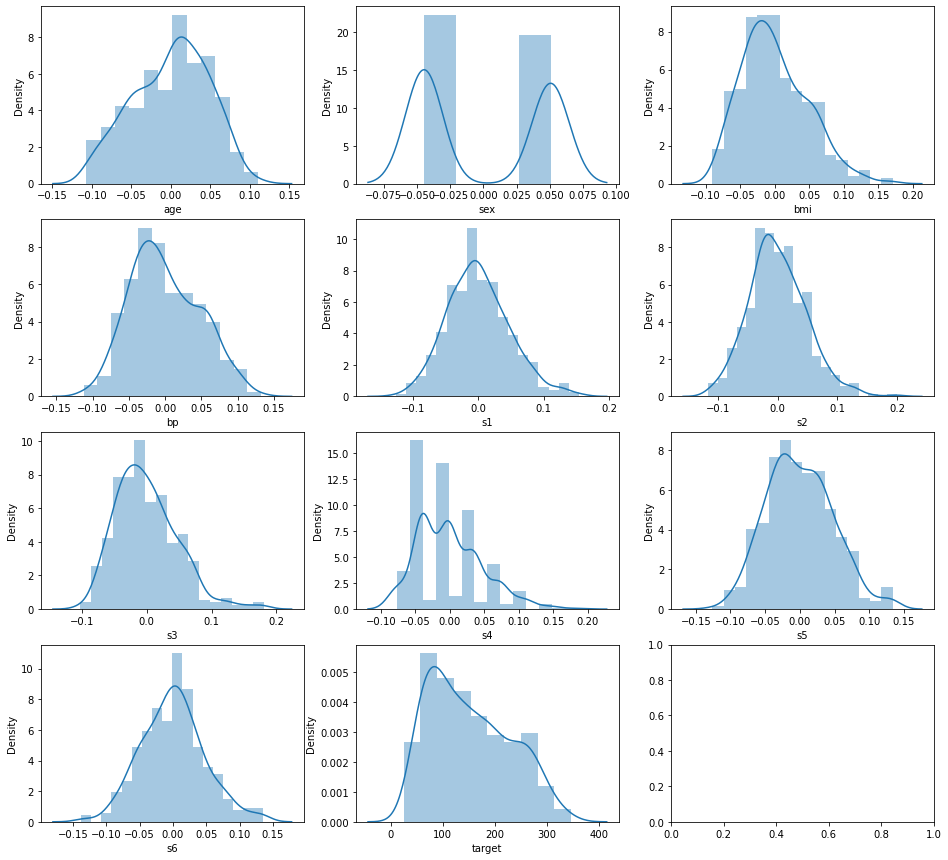

In [8]:
import math, pprint
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from matplotlib.colors import ListedColormap

pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

def print_df(df):
    display(HTML(df.to_html()))
    
def boxplot_grid(df, nb_grid_cols=3, figsize=(16,15)):
    df_num = df.select_dtypes(include=[np.number])
    nb_num_vars = len(df_num.columns)
    fig, axes = plt.subplots(math.ceil(nb_num_vars/nb_grid_cols), nb_grid_cols, figsize=figsize)
    for i, col in enumerate(df_num.columns):
        sns.boxplot(df_num[col], orient="v", ax=axes[int(i/nb_grid_cols),i%nb_grid_cols])
    plt.show()
        
def density_plot_grid(df, nb_grid_cols=3, figsize=(16,15)):
    df_num = df.select_dtypes(include=[np.number])
    nb_num_vars = len(df_num.columns)
    fig, axes = plt.subplots(math.ceil(nb_num_vars/nb_grid_cols), nb_grid_cols, figsize=figsize)
    for i, col in enumerate(df_num.columns):
        not_null_col = df_num[col][df_num[col].notnull()]
        sns.distplot(not_null_col, ax=axes[int(i/nb_grid_cols),i%nb_grid_cols])
    plt.show()

def explore_data(df):
    print(f"Dimensions de la matrice des observations : {df.shape}")
    print("\nExtrait : \n")
    print_df(df.head())
    print("\nTypes des variables : \n")
    print(df.dtypes)
    print("\nDescription des variables numériques : \n")
    print_df(df.describe())
    print("\nDescription des variables catégorielles : \n")
    for col in df.select_dtypes(include=[object]).columns:
        counts = df[col].value_counts()
        if len(counts) < 20:
            print("\nModalités de la variable ", col)
            pprint.pprint(df[col].value_counts())
        else:
            print("\nLa variable %s possède %i modalités" % (col, len(counts)))
    print("\nAnalyse des corrélations : \n")
    plt.figure(figsize=(6, 5))
    sns.heatmap(df.corr())
    plt.show()
    print("\nValeurs manquantes : \n")
    print(pd.isnull(df).sum())
    print("\nBoîtes à moustaches : \n")
    boxplot_grid(df)
    print("\nHistogrammes avec estimation de densité : \n")
    density_plot_grid(df)

explore_data(df)

## 4.2 Construction du jeu d'entraînement et du jeu de test

Nous devons sans tarder réserver un jeu de test... Sinon, nous serons incapables de mesurer la capacité de votre modèle à généraliser, c'est-à-dire à prédire sur de nouvelles données. Pour cela utilisez la fonction [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) en réservant 20% du dataset pour notre jeu de test :

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=77)

In [10]:
test.shape

(89, 11)

Avant de construire les modèles prédictifs, il convient de séparer les variables de la cible à prédire. construisez deux dataframes `X_tain` et `X_test` contenant notre jeu de donnée sans la cible (colonne `target`). De même construisez `y_train` et `y_test` ne contenant que la cible :

In [11]:
X_train = train.drop("target", axis=1)
y_train = train["target"].copy()
X_test = test.drop("target", axis=1)
y_test = test["target"].copy()

## 4.3 Régression linéaire

Nous allons maintenant entrainer un modèle de régression linéaire sur le jeu d'entrainement et vérifier ses performances sur le jeu de test.

Importez la classe `LinearRegression` du module `sklearn.linear_model` ([sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) et la fonction `mean_squared_error` du module `sklearn.metrics` ([sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)) :

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Créez une instance de la classe `LinearRegression` et affectez là à la variable `lr` :

In [13]:
lr = LinearRegression()

Entrainez votre modèle de régression linéaire sur votre dataset d'entrainement. En clair, appelez la méthode `fit` sur votre objet `lr` en lui passant comme arguments votre dataset d'entrainement (`X_train`, car nous ne voulons pas lui donner la cible) et la cible (i.e. : les labels, `y_train`). L'appel à `fit` ne retourne rien, votre objet `lr` a évolué en interne et à trouvé les coefficients de la régression linéaire minimisant la fonction de coût :

In [14]:
lr.fit(X_train, y_train)

LinearRegression()

Affichez le contenu des attributs `intercept_` et `coef_` de votre objet `lr`, ce sont, respectivement, l'ordonnée à le biais de votre régresseur (nous allons expliquer ce biais ci-dessous).

In [15]:
lr.intercept_, lr.coef_

(151.04663391659793,
 array([ -42.80984972, -280.68951972,  494.21407839,  325.87324109,
        -399.63858695,  173.24936504, -101.33959377,   92.05180552,
         645.41117811,   47.96480142]))

Importez le package `numpy` dans son intégralité et renomez le en `np` (syntaxe `import le_nom_du_package as son_alias`) :

In [16]:
import numpy as np

Calculez la moyenne des cibles en appelant la fonction `mean` de `numpy` et en lui passant `y_train` en argument. Cette valeur devrait être égale au biais de notre régression linéaire. Ce biais est la valeur que doit prendre la cible si tous les coefficients étaient à zéro (un tel individu n'est probablement pas possible dans la réalité), ici, la valeur de `intercept_` est la moyenne des valeurs de nos cibles :

In [17]:
np.mean(y_train)

151.40793201133144

## 4.4 Mesures de performance

Vérifions les performances de notre regresseur sur notre dataset de test. Appelez la méthode `predict` de votre objet `lr` avec comme argument `X_test` seulement (nous ne lui fournissons pas la cible de notre dataset de test, car c'est que nous voulons prédire). Stockez ce résultat dans une variable `y_pred` et affichez le contenu de cette variable. Que vous renvoie cette méthode ?

In [18]:
y_pred = lr.predict(X_test)
y_pred

array([135.92914462, 148.84729173, 117.84317825, 123.46107646,
       177.81339491, 122.44365452,  98.42565834, 238.72188059,
       154.40366832, 143.0695936 , 233.20861342, 174.54942339,
       107.24352822, 146.49125603, 122.15175267, 118.07148828,
       141.8808684 , 154.40835472, 168.22534712, 222.42567594,
       158.71740036, 218.71914702, 251.11513693, 123.60262825,
        91.33217585, 237.16716374, 155.13145297, 108.03671514,
       110.36740863, 142.74871521, 144.50350075, 247.83360543,
       167.54244014,  55.0179506 , 149.74642363,  79.12992634,
       253.37180241, 111.2817938 , 202.06272825, 152.98804099,
        81.09444   ,  98.56462198,  86.61089643, 203.16984922,
       245.80153927, 195.1901237 , 226.97826389, 197.95095496,
       152.35450016, 190.21920681,  88.78072625,  50.42625003,
       224.76034931, 247.75834747, 210.86126174,  47.3456636 ,
       148.79083248, 161.48506676, 119.13757459, 252.46819092,
       173.63948794, 171.58072173,  74.55246225, 109.08

Importez les méthodes `mean_squared_error` et `mean_absolute_error` du module [`sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics), vous pouvez importer plusieurs fonctions (ou classes) d'un même module en utilisant la syntaxe `from module_name import function_name_a, function_name_b` :

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

Calculez et affichez l'erreur quadratique moyenne (Mean Squarred Error ou MSE) de vos prédictions sur le dataset de test en utilisant la fonction `mean_squared_error` avec `y_test` et `y_pred` (dans cet ordre). Est-ce que cette valeur vous semble interprétable par rapport à la moyenne (fonction `mean` du module `numpy`), le max (fonction `max` du module `numpy` ou fonction `max` de la librairie standard de Python) et le min (fonction `min` du module `numpy` ou fonction `min` de la librairie standard Pyton) de votre cible ?

In [20]:
np.min(y_test), np.max(y_test), np.mean(y_test)

(31.0, 341.0, 155.01123595505618)

In [21]:
mean_squared_error(y_test, y_pred)

3134.0656910376897

Importez l'ensemble du module `math` de la librairie standard de Python (syntaxe : `import module_name`) :

In [22]:
import math

Appliquez la fonction `sqrt` du module `math` la librairie standard de Python (syntaxe : `nom_module.nom_de_la_fonction`) sur le MSE (vous obtiendez alors le Root MSE ou RMSE), est-ce que cette valeur vous semble interprétable par rapport à votre cible ?

In [23]:
math.sqrt(mean_squared_error(y_test, y_pred))

55.98272672028123

Calculez et affichez l'erreur absolue moyenne (Mean Absolute Error ou MAE) de vos prédictions sur le dataset de test en utilisant la fonction `mean_absolute_error` avec `y_test` et `y_pred` (dans cet ordre), est-ce que cette valeur vous semble interprétable par rapport à votre cible ?

In [24]:
mean_absolute_error(y_test, y_pred)

46.82023956216134

Pour mieux comprendre la différence entre la RMSE et la MAE, appliquez ces deux métriques sur les trois ensembles de cibles de test et de prédiction synthétiques suivants. Quelle conclusion pouvez-vous en tirer sur la différence entre RMSE et MAE ?

In [32]:
y_synthetic_test = [1, 1, 1, 1, 1, 1, 1]
y_synthetic_pred_1 = [3, 3, 3, 3, 3, 3, 3]
y_synthetic_pred_2 = [2, 2, 2, 2, 3, 4, 6]
y_synthetic_pred_3 = [1, 1, 1, 1, 1, 1, 10]

In [33]:
mean_absolute_error(y_synthetic_test, y_synthetic_pred_1)

2.0

In [34]:
math.sqrt(mean_squared_error(y_synthetic_test, y_synthetic_pred_1))

2.0

In [35]:
mean_absolute_error(y_synthetic_test, y_synthetic_pred_2)

2.0

In [36]:
math.sqrt(mean_squared_error(y_synthetic_test, y_synthetic_pred_2))

2.449489742783178

In [37]:
mean_absolute_error(y_synthetic_test, y_synthetic_pred_3)

1.2857142857142858

In [38]:
math.sqrt(mean_squared_error(y_synthetic_test, y_synthetic_pred_3))

3.401680257083045

## 4.5 Regression linéaire régularisée

Entrainez sur le dataset d'entrainement et testez les performances (RMSE et MAE) sur le dataset de test des modèles de régressions linéaire régularisés [`sklearn.linear_model.Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) et [`sklearn.linear_model.Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) en utilisant les paramètres par défaut (vous n'avez donc pas besoin de spécifier de paramètres lors de l'appel aux constructeurs de ces classes, par exemple : `ridge = Ridge()`). Entre la régression linéaire simple, la régression Ridge et la régression Lasso, quelle est la méthode la plus performante sur le dataset de test ?

In [39]:
from sklearn.linear_model import Ridge, Lasso

In [40]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
mean_absolute_error(y_test, y_pred), math.sqrt(mean_squared_error(y_test, y_pred))

(51.50936766059714, 60.00038267791709)

In [41]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mean_absolute_error(y_test, y_pred), math.sqrt(mean_squared_error(y_test, y_pred))

(55.1440418899325, 64.84359134588051)

## 4.6 Validation croisée

Nous avons comparé l'efficacité de plusieurs modèles sur notre dataset de test ... ce qu'il ne faut surtout par faire. Nous reprenons cette comparaison en utilisant la validation croisée sur le jeu d'entrainement.

Créez un nouveau modèle de régression linéaire simple, puis appliquez la fonction [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Les paramètres à utiliser pour cette fonction sont dans l'ordre : votre modèle de régression linéaire, votre dataset d'entrainement, vos cibles d'entrainement, `scoring="neg_mean_squared_error"` (nous devons indiquer la métrique de performance à calculer) et `cv=10` (vous pouvez changer ce paramètre pour obtenir plus ou moins de plis). Affectez le résultat à une variable `linear_cv_scores` et affichez la.

In [51]:
from sklearn.model_selection import cross_val_score

In [82]:
scores = cross_val_score(LinearRegression(), X_train, y_train, scoring="neg_mean_squared_error", cv=10)
scores

array([-2778.64579408, -2545.13438898, -2539.48564232, -3268.61024895,
       -2547.83622329, -4374.2029663 , -2993.32496847, -3163.57275095,
       -2675.50045841, -2855.97290501])

Nous obtenons la performance d'une régression linéaire pour 10 plis sur notre dataset d'entrainement. Cette valeur est négative car scikit-learn ne permet de calculer que la valeur négative du MSE avec une validation croisée.

Affichez le résultat de `-scores`. Qu'observez vous ?
Pour calculer le RMSE pour chacun des 10 plis, ous ne pouvons pas appliquer la méthode `sqrt` de la librairie standard de Python directement car elle n'est pas applicable à un tableau numpy (`type(scores)` vous permet de vérifier le type de cette variable). Appliquez la fonction `numpy.sqrt` à aux valeurs négatives de `scores` ou appelez directement la méthode `sqrt` sur la variable `scores` (tout tableau numpy dispose d'un ensemble de méthodes déjà disponibles, tel que la racine carrée).

Calculez ensuite la moyenne et l'écart type des RMSE obtenus sur les 10 plis (vous pouvez appeler directement les méthodes `mean` et `std` sur des tableaux numpy). Que pouvez-vous en conclure sur la  variance d'un modèle de régression linéaire appliqué à notre dataset ?

In [53]:
-scores

array([2778.64579408, 2545.13438898, 2539.48564232, 3268.61024895,
       2547.83622329, 4374.2029663 , 2993.32496847, 3163.57275095,
       2675.50045841, 2855.97290501])

In [54]:
type(scores)

numpy.ndarray

In [55]:
import math
math.sqrt(scores)

TypeError: only size-1 arrays can be converted to Python scalars

Calculez la moyenne (`numpy.mean`) et l'écart type (`numpy.std`) de `scores`. Que pouvez-vous conclure sur le biais et la variance d'un modèle de régression linéaire appliqué à notre dataset ?

In [56]:
np.sqrt(-scores).mean(), np.sqrt(-scores).std()

(54.34645875242002, 4.548742215857727)

Stockez la racine carrée de nos scores négatifs dans une variable `linear_cv_scores`, cette variable nous servira plus tard pour comparer nos modèles :

In [57]:
linear_cv_scores = np.sqrt(-scores)

## 4.7 Optimisation des hyper-paramètres

Nous allons maintenant chercher le meilleur paramètre de régularisation pour les régressions linéaires régularisées. Commencez par importer la classe [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) :

In [87]:
from sklearn.model_selection import GridSearchCV

Nous définissons ensuite l'ensemble des coefficients de régularisation que nous allons tester. Appelez la fonction [`numpy.logspace`](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html) avec les paramètres `-2`, `2` et `10` et stockez le résultat dans une variable `regul_coeffs`. Nous avons créé un tableau numpy contenant des nombres uniformément répartis sur une échelle logarithmique (en base 10) entre -2 et 2.

In [86]:
regul_coeffs = np.logspace(-2, 2, 10)
regul_coeffs

array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02])

Crééz une liste python nommée `param_grid` contenant un dictionnaire avec une unique clef `alpha` dont la valeur est `regul_coeffs`. Cette liste est une grille d'hyper-paramètres, elle servira à indiquer à `GridSearchCV` que nous souhaitons faire varier le paramètre `alpha` de l'estimateur que nous lui passerons en paramètre (un estimateur scikit-learn peut-être un régresseur ou un classifueur, i.e. : un algo qui permet d'entrainer un modèle, avec la méthode `fit`, et de prédire des valeurs, avec la méthode `predict`). Cette grille pourrait contenir plusieurs hyper-paramètres à faire varier (tous nommés en fonction des paramètres de nos estimateurs), dans ce cas, toutes les combinaisons seraient testées.

In [89]:
param_grid = [{'alpha': regul_coeffs}]
param_grid

[{'alpha': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
         5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
         3.59381366e+01, 1.00000000e+02])}]

Instanciez la classe `GridSearchCV` (nommez votre instance `grid_search`) avec comme paramètres : une instance de régression Lasso, votre grille de d'hyper-paramètres, la valeur `5` pour le paramètre `cv`, la valeur `neg_mean_squared_error` pour le paramètre `scoring`, la valeur `True` pour le paramètre `return_train_score`.

In [102]:
grid_search = GridSearchCV(
    lasso, param_grid, cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

Appelez la méthode `fit` sur votre instance de `GridSearchCV` avec comme paramètres votre dataset d'entrainement et vos cibles d'entrainement. Cet appel vous affiche en sortie les paramètres de votre recherche des meilleurs hyper-paramètres, dont votre grille d'hyper-paramètres.

In [103]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02])}],
             return_train_score=True, scoring='neg_mean_squared_error')

Affichez les attributs `best_params_`, `best_score_` et `cv_results_` de votre objet `grid_search`. Attention : nous avons utilisé la métrique de performance `neg_mean_squared_error`.

Quel est le meilleur coefficient de régularisation ? Quel est le score correspondant ? Quel sont la moyenne (simple à trouver) et l'écart type (complexe à trouver, facultatif) de la validation croisée sur les 5 plis de notre grid search pour le meilleur coefficient de régularisation ?

In [108]:
grid_search.best_params_

{'alpha': 0.0774263682681127}

In [105]:
np.sqrt(-grid_search.best_score_)

54.384146005140266

In [106]:
grid_search.cv_results_

{'mean_fit_time': array([0.00442128, 0.00238581, 0.00227642, 0.00228343, 0.00249166,
        0.00227957, 0.0022119 , 0.00217791, 0.00230117, 0.00274014]),
 'std_fit_time': array([2.63933246e-03, 1.12375294e-04, 9.47686711e-05, 1.74688927e-04,
        1.74754957e-04, 1.52882902e-04, 1.30422119e-04, 1.14312438e-04,
        1.98135703e-04, 7.76975869e-04]),
 'mean_score_time': array([0.00263381, 0.00178547, 0.00152183, 0.00153618, 0.00170722,
        0.00153918, 0.00155101, 0.00150328, 0.00157413, 0.00179362]),
 'std_score_time': array([9.55776711e-04, 3.31288064e-04, 1.14738752e-04, 9.07493148e-05,
        1.63833753e-04, 9.61335405e-05, 1.23196913e-04, 9.68630342e-05,
        1.23833940e-04, 3.33267115e-04]),
 'param_alpha': masked_array(data=[0.01, 0.027825594022071243, 0.0774263682681127,
                    0.21544346900318834, 0.5994842503189409,
                    1.6681005372000592, 4.6415888336127775,
                    12.915496650148826, 35.93813663804626, 100.0],
           

In [110]:
min_fold = grid_search.cv_results_['rank_test_score'].argmin()
print(
    np.sqrt(-grid_search.cv_results_['mean_test_score'][min_fold]),
    'std wrong way =', np.sqrt(grid_search.cv_results_['std_test_score'][min_fold]),
    'std proper way =',
    np.std([np.sqrt(-grid_search.cv_results_["split{}_test_score".format(i)][min_fold]) for i in range(5)])
)

54.384146005140266 std wrong way = 15.002702786645477 std proper way = 2.042339796731573


`GridSearchCV` fournit directement une instance de notre estimateur avec les meilleurs hyper-paramètres via l'attribut `best_estimator_`. Stockez la sortie de cet attribut dans une variable `best_lasso_model` :

In [111]:
best_lasso_model = grid_search.best_estimator_

Appliquez une validation croisée sur cet estimateur avec 10 plis et stockez la racine carré des valeurs négatives des scores dans une variable `lasso_cv_scores`, puis affichez la moyenne et l'écart type obtenu :

In [113]:
scores = cross_val_score(best_lasso_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lasso_cv_scores = np.sqrt(-scores)
np.mean(lasso_cv_scores), np.std(lasso_cv_scores)

(54.256887671735385, 4.373394237525864)

Faites de même pour une regression Ridge avec les mêmes valeurs pour le coefficient de régularisation, stockez les scores dans la variable `ridge_cv_scores` :

In [115]:
param_grid = [{'alpha': regul_coeffs}]
grid_search = GridSearchCV(
    ridge, param_grid, cv=5,
    scoring="neg_mean_squared_error", return_train_score=True
)
grid_search.fit(X_train, y_train)
print('Meilleur coefficient de régularisation : ', grid_search.best_params_["alpha"])
rmse_best_train = np.sqrt(-grid_search.best_score_)
print('rmse entraînement: ', rmse_best_train)
best_ridge_model = grid_search.best_estimator_
scores = cross_val_score(best_ridge_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
ridge_cv_scores = np.sqrt(-scores)
np.mean(ridge_cv_scores), np.std(ridge_cv_scores)

Meilleur coefficient de régularisation :  0.0774263682681127
rmse entraînement:  54.43907921057756


(54.26347685438877, 4.1708977327893235)

## 4.8 Comparaison des modèles

Nous pouvons maintenant comparer les performances de nos modèles objectivement (i.e. : avec des validations croisées sur notre dataset de test) au travers de leurs moyennes et de leurs écart-types. Si vous avez respecté les noms des variables pour les scores des régressions linéaires simple, Ridge et Lasso (sinon, changez le nom des variables sur la première ligne), vous pouvez exécuter la cellule suivante pour avoir un graphique comparant ces trois méthodes.

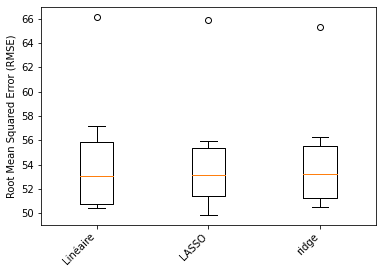

In [116]:
model_scores = [linear_cv_scores, lasso_cv_scores, ridge_cv_scores]
model_names = ['Linéaire', 'LASSO', 'ridge']
figure = plt.figure()
axis = figure.add_subplot(111)
plt.boxplot(model_scores)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Root Mean Squared Error (RMSE)");

## 4.9 Autres modèles (facultatif)

Testez et comparez les modèles suivants avec les modèles précédents (pensez à recherchez les meilleurs hyper-paramètres indiqués entre parenthèse) :
* [`sklearn.linear_model.ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) (`alpha` et `l1_ratio`)
* [`sklearn.ensemble.RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) (`min_samples_leaf` et `max_features`)

## 4.10 Evaluation du meilleur modèle sur le jeu de test

Vous pouvez maintenant évaluer les performances du meilleur modèle obtenu avec la validation croisée sur le dataset de test :

In [117]:
from sklearn.metrics import mean_squared_error

test_pred = lr.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print("Test RMSE : ", test_rmse)

Test RMSE :  55.98272672028123


## 4.11 Comparaison de l'effet du coefficient de régularisation pour Ridge et Lasso

Nous construisons plusieurs modèles de régression :
* Une régression linéaire simple.
* Une régression linéaire régularisée de type 'ridge'.
* Une régression linéaire regularisée de type 'LASSO'.

Pour les modèles régularisés, nous testons $10$ valeurs entre $10^{-2}$ et $10^2$ pour le coefficient de régularisation.

Nous traçons l'évolution des poids associés aux variables de la régression linéaire en fonction de la valeur du coefficient de régularisation.

Comment interprétez-vous la différence d'évolution de ces poids pour la régularisation ridge et LASSO ?

Observez-vous des connexions avec l'étude de la corrélation entre les variables ?

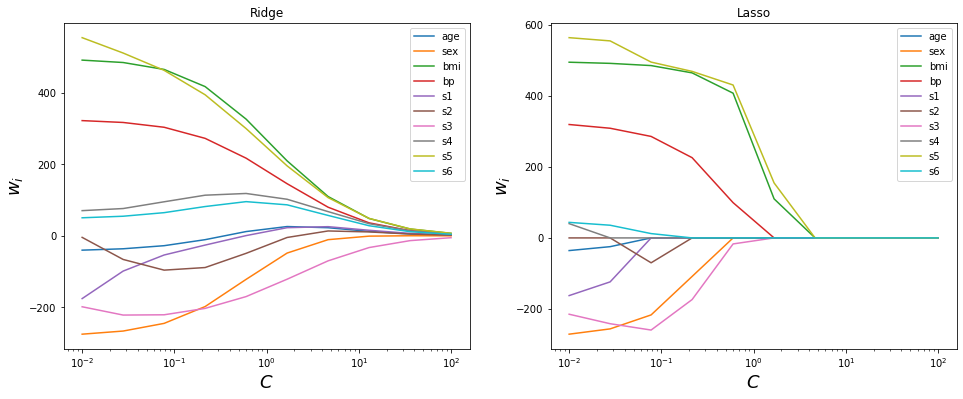

In [118]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)
pred = linear.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, pred))

ridge = linear_model.Ridge()
lasso = linear_model.Lasso()

regul_coefs = np.logspace(-2, 2, 10)

rmse_ridge = []
rmse_lasso = []
params_ridge = []
params_lasso = []

for c in regul_coefs:
    ridge.set_params(alpha=c)
    ridge.fit(X_train, y_train)
    params_ridge.append(ridge.coef_)
    pred = ridge.predict(X_test)
    rmse_ridge.append(np.sqrt(mean_squared_error(y_test, pred)))
    
    lasso.set_params(alpha=c)
    lasso.fit(X_train, y_train)
    params_lasso.append(lasso.coef_)
    pred = lasso.predict(X_test)
    rmse_lasso.append(np.sqrt(mean_squared_error(y_test, pred)))

plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
lines = plt.semilogx(regul_coefs, params_ridge)
plt.legend(lines, df.columns.values)
plt.xlabel('$C$',fontsize=18)
plt.ylabel('$w_i$',fontsize=18)
plt.title('Ridge')

plt.subplot(1,2,2)
lines = plt.semilogx(regul_coefs, params_lasso)
plt.legend(lines, df.columns.values)
plt.xlabel('$C$',fontsize=18)
plt.ylabel('$w_i$',fontsize=18)
plt.title('Lasso')

plt.show()

### Evaluation de la performance des modèles sur le jeu de test

Que conclure de l'évaluation comparée des modèles sur le jeu de test ? La régularisation est-elle utile ?

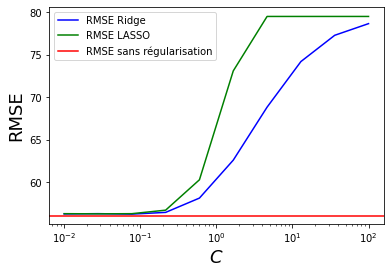

In [119]:
plt.semilogx(regul_coefs, rmse_ridge, 'b', label='RMSE Ridge')
plt.semilogx(regul_coefs, rmse_lasso, 'g', label='RMSE LASSO')
plt.axhline(y=rmse_linear, color='r', linestyle='-', label='RMSE sans régularisation')
plt.legend(loc='best')
plt.xlabel('$C$', fontsize=18)
plt.ylabel('RMSE', fontsize=18)
plt.show()